### View Dataset

In [329]:
import pandas as pd
import webbrowser
import os
# Read the dataset into a data table using Pandas
data = pandas.read_csv('housesale.csv')

# Create a web page view of the data for easy viewing
html = data[0:100].to_html()

# Save the html to a temporary file
with open("data.html", "w") as f:
    f.write(html)
# Open the web page in our web browser
full_filename = os.path.abspath("data.html")
webbrowser.open("file://{}".format(full_filename))
print(list(data.columns))
data.head()
print(data.shape)


['Township', 'PIN', 'Class', 'Address', 'Grantor', 'Grantee', 'Sale Type', 'SaleDate', 'Sale Price', 'Notes', 'Latitude', 'Longitude', 'Year', 'Month', 'Quarter']
(16831, 15)


### Data exploration and visulization

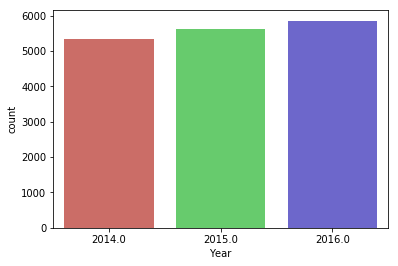

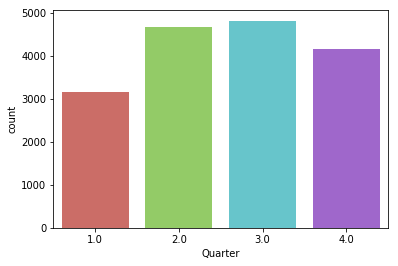

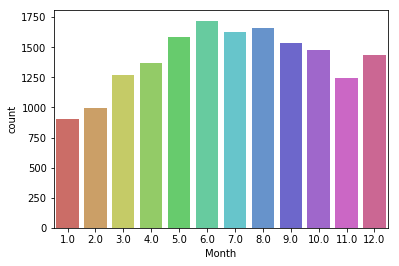

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt

## Count plot
sns.countplot(x='Year',data=data, palette='hls')
plt.show()
sns.countplot(x='Quarter',data=data, palette='hls')
plt.show()
sns.countplot(x='Month',data=data, palette='hls')
plt.show()

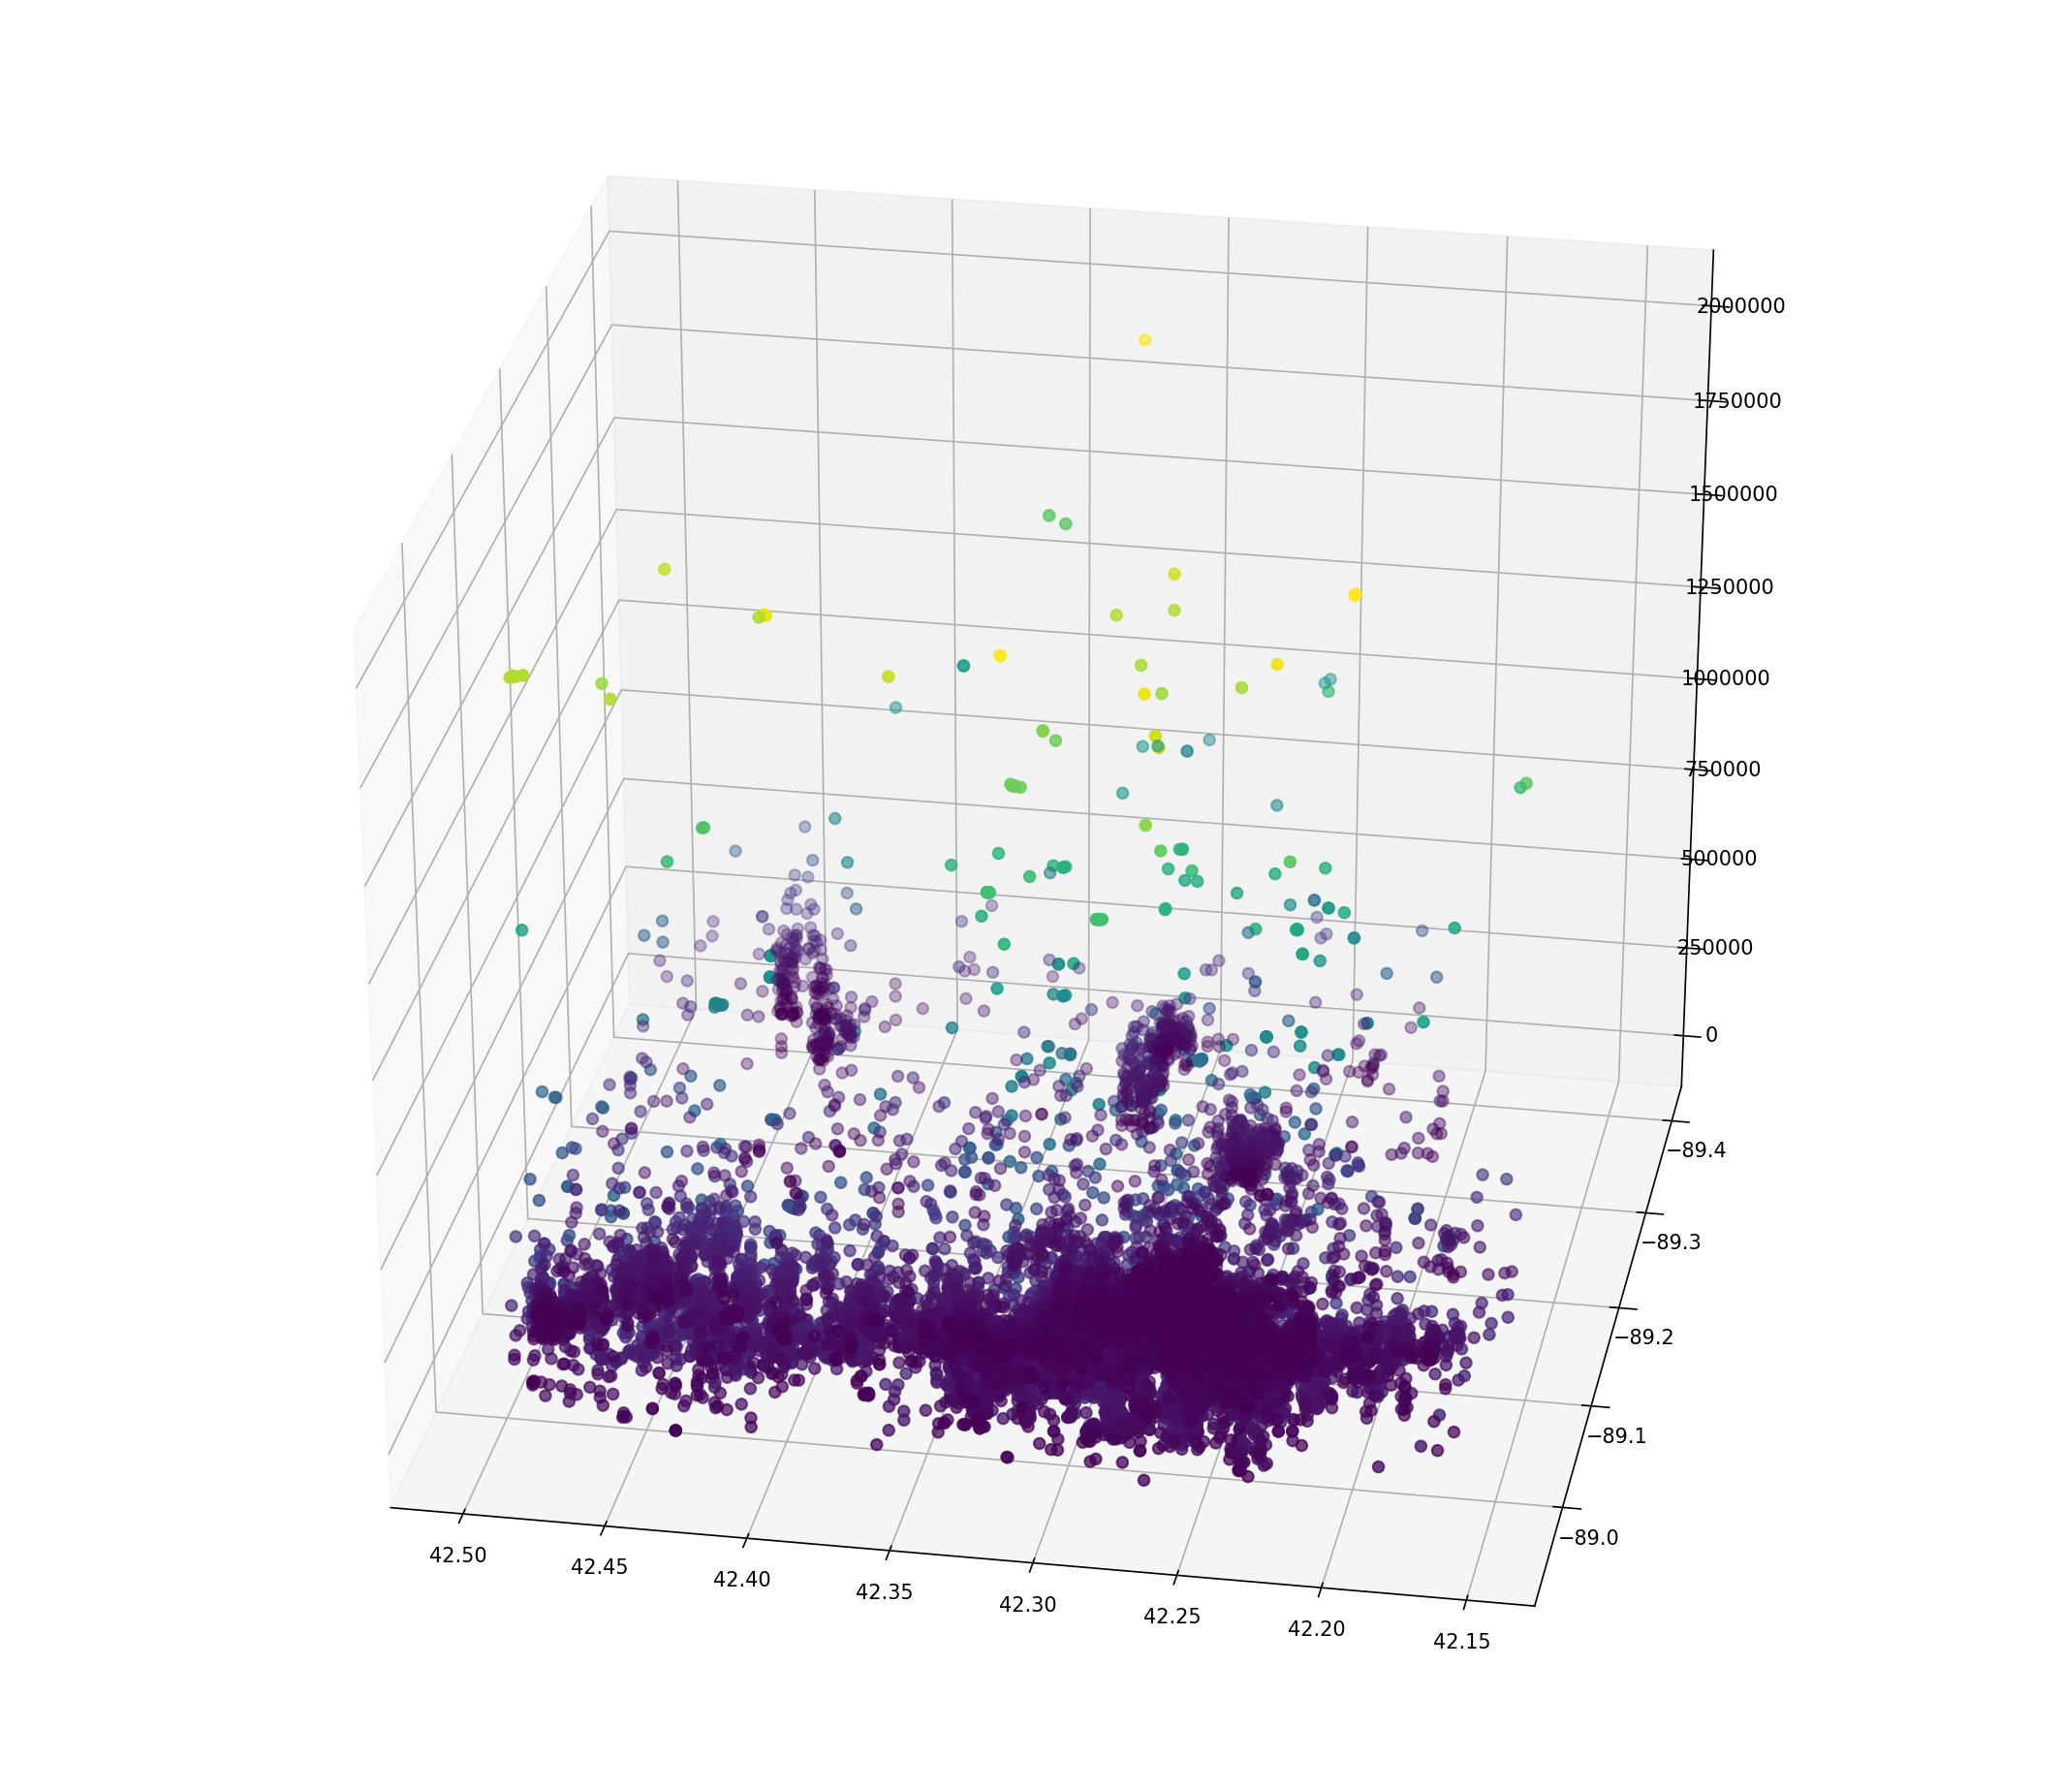

In [361]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18, 16), dpi= 150, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Latitude'], data['Longitude'], data['Sale Price'], c=data['Sale Price'], s=30)
ax.view_init(30, 100)
plt.show()


In [381]:

fig = plt.figure(figsize=(50,50 ), dpi= 300, facecolor='w', edgecolor='k')
sns.boxplot(x="Township", y="Sale Price", data=data)
plt.show()


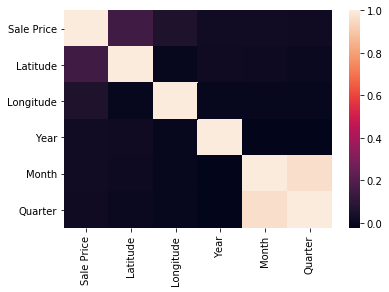

In [359]:
## heatmap correlations
sns.heatmap(data.corr()) 
plt.show()

### Gradient boosting regression and forecast accuracy (Mean Absolute Error)
Hyperparameter
    'n_estimators'
    'max_depth'
    'min_samples_leaf': 
    'learning_rate': 
    'max_features': 

In [152]:

from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.externals import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load the data set
df = pd.read_csv("housesale.csv")
##checking for missing value
df.isnull().sum()


Township         0
PIN              0
Class            1
Address          0
Grantor          2
Grantee          2
Sale Type        0
SaleDate         0
Sale Price       0
Notes         9432
Latitude       481
Longitude      481
Year             0
Month            0
Quarter          0
dtype: int64

In [50]:

# Remove the fields from the data set that we don't want to include in our model
del df['PIN']
del df['Address']
del df['Grantor']
del df['Grantee']
del df['SaleDate']
del df['Notes']

In [51]:
# Drop the rows with Null value
df.dropna(subset=['Longitude','Latitude','Class' ], inplace=True)

In [52]:
df.isnull().sum()
print(df.shape)

(16548, 9)


In [53]:
# Replace categorical data with one-hot encoded data
features_df = pd.get_dummies(df, columns=['Township', 'Class', 'Sale Type'])

# Remove the sale price from the feature data
del features_df['Sale Price']

# Create the X and y arrays
X = features_df.as_matrix()
y = df['Sale Price'].as_matrix()

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create the model
model = ensemble.GradientBoostingRegressor()

# Parameters we want to try
param_grid = {
    'n_estimators': [500, 1000, 3000],
    'max_depth': [4, 6],
    'min_samples_leaf': [3, 5, 9, 17],
    'learning_rate': [0.1, 0.05, 0.02, 0.01],
    'max_features': [1.0, 0.3, 0.1],
    'loss': ['ls', 'lad', 'huber']
}

# Define the grid search we want to run. Run it with four cpus in parallel.
gs_cv = GridSearchCV(model, param_grid, n_jobs=4)

# Run the grid search - on only the training data!
gs_cv.fit(X_train, y_train)

# Print the parameters that gave us the best result!
print(gs_cv.best_params_)

# 

# Find the error rate on the training set using the best parameters
mse = mean_absolute_error(y_train, gs_cv.predict(X_train))
print("Training Set Mean Absolute Error: %.4f" % mse)

# Find the error rate on the test set using the best parameters
mse = mean_absolute_error(y_test, gs_cv.predict(X_test))
print("Test Set Mean Absolute Error: %.4f" % mse)





{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 6, 'max_features': 0.3, 'min_samples_leaf': 3, 'n_estimators': 3000}
Training Set Mean Absolute Error: 14801.7430
Test Set Mean Absolute Error: 80473.5587


After tuning our model by grid search, we got the best set of hyperparameters. The absolute error is the absolute value of the difference between the forecasted value and the actual value. Mean absolute value tells us how big of an error we can expect from the forecast on average.Training Set Mean Absolute Error is 14801.7430. While, test Set Mean Absolute Error (80473.5587) is knid of high.Our model is overfitted. Considering our wide property sale price range, the results are reasonable. 

In [87]:
# Fit regression model
model = ensemble.GradientBoostingRegressor(
    n_estimators=3000,
    learning_rate=0.1,
    max_depth=6,
    min_samples_leaf=3,
    max_features=0.3,
    loss='ls',
    random_state=0
)
model.fit(X_train, y_train)

# Save the trained model to a file so we can use it in other programs
joblib.dump(model, 'trained_house_classifier_model.pkl')

['trained_house_classifier_model.pkl']

#### Feature selection

In [161]:
#features_df
features_df.columns

Index(['Latitude', 'Longitude', 'Year', 'Month', 'Quarter', 'Township_BURRITT',
       'Township_CHERRY VALLEY', 'Township_DURAND', 'Township_HARLEM',
       'Township_HARRISON', 'Township_LAONA', 'Township_OWEN',
       'Township_PECATONICA', 'Township_ROCKFORD', 'Township_ROCKTON',
       'Township_ROSCOE', 'Township_SEWARD', 'Township_SHIRLAND',
       'Township_WINNEBAGO', 'Class_ASSOC. COMMON PROP',
       'Class_COMM. PREFERENTIAL', 'Class_COMM. RESIDENTIAL',
       'Class_COMMERCIAL LAND', 'Class_CONDOMINIUM',
       'Class_Conservation Stewardsh', 'Class_EDUCATIONAL',
       'Class_EXEMPT COMM LAND', 'Class_EXEMPT FOUR FAMILY',
       'Class_EXEMPT GOVERNMENT', 'Class_EXEMPT IMPROVED IND',
       'Class_EXEMPT MISC RES.', 'Class_EXEMPT OFFICE',
       'Class_EXEMPT RELIGIOUS', 'Class_EXEMPT RES. LAND',
       'Class_EXEMPT RETAIL/BUSINE', 'Class_EXEMPT RURAL LAND',
       'Class_EXEMPT SINGLE FAMILY', 'Class_EXEMPT SOCIAL/CHAR.',
       'Class_FIVE FAMILY', 'Class_FOUR FAMILY',

In [158]:

# Load the trained model created with train_model.py
model = joblib.load('trained_house_classifier_model.pkl')

# Create a numpy array based on the model's feature importances
importance = model.feature_importances_

# Sort the feature labels based on the feature importance rankings from the model
feauture_indexes_by_importance = importance.argsort()

# Print each feature label, from most important to least important (reverse order)
for index in feauture_indexes_by_importance:
    print("{} - {:.2f}%".format(features_df.columns[index], (importance[index] * 100.0)))


Class_EXEMPT SOCIAL/CHAR. - 0.00%
Class_FIVE FAMILY - 0.00%
Sale Type_SALE LEASE - 0.00%
Class_EXEMPT RURAL LAND - 0.00%
Class_EXEMPT RETAIL/BUSINE - 0.00%
Class_EXEMPT OFFICE - 0.00%
Class_EXEMPT MISC RES. - 0.00%
Class_EXEMPT IMPROVED IND - 0.00%
Class_IND. PREFERENTIAL - 0.00%
Class_EXEMPT FOUR FAMILY - 0.00%
Class_EDUCATIONAL - 0.00%
Class_RELIGIOUS - 0.00%
Class_ASSOC. COMMON PROP - 0.00%
Class_Farm w/non-farm+HS - 0.00%
Sale Type_VETDEED - 0.00%
Sale Type_CONT CURR - 0.00%
Sale Type_GD - 0.00%
Sale Type_EXEMPT - 0.01%
Sale Type_TRADE - 0.01%
Sale Type_MORE - 0.01%
Class_EXEMPT SINGLE FAMILY - 0.01%
Sale Type_AUCTION - 0.01%
Sale Type_CONTRACT - 0.01%
Sale Type_CHAR - 0.01%
Sale Type_OPTION - 0.01%
Sale Type_SHERIFF - 0.01%
Sale Type_BANK - 0.01%
Sale Type_RELOCATION - 0.02%
Class_EXEMPT RES. LAND - 0.02%
Sale Type_PRIOR - 0.02%
Class_Conservation Stewardsh - 0.02%
Sale Type_PT - 0.02%
Class_EXEMPT RELIGIOUS - 0.03%
Class_Farm w/non-farm,no HS - 0.03%
Sale Type_ADM - 0.03%
Sale Ty

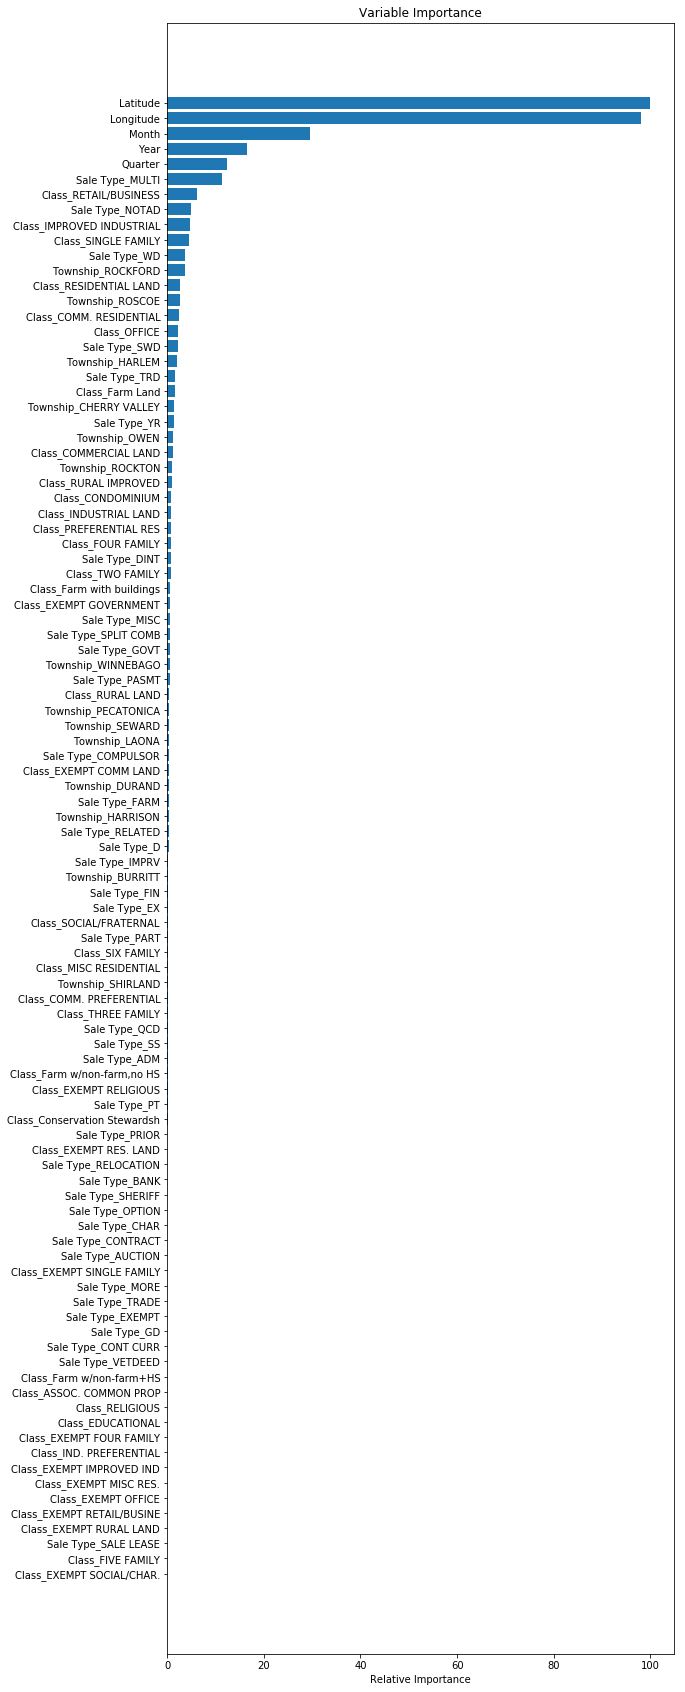

In [159]:
# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20, 30))
plt.subplot(1, 2, 2)

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, features_df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


#### Make predictions

In [197]:

# Load the model we trained previously
model = joblib.load('trained_house_classifier_model.pkl')

# For the property we want to value, we need to provide the features in the exact same
# arrangement as our training data set.

property_to_value = [
    
                #Location features
    
                     42.362106#'Latitude', 
                    -89.147751,#'Longitude', 
            
                #Time  features
                    2016,#'Year',
                    1, #'Month', 
                    1, #'Quarter', 
                    
               #Township featrues:Choose only one
            
                    0,#'Township_BURRITT',
                    0,#'Township_CHERRY VALLEY', 
                    0,#'Township_DURAND', 
                    0, #'Township_HARLEM',
                    0, #'Township_HARRISON',
                    0, #'Township_LAONA', 
                    0, #'Township_OWEN',
                    0, #'Township_PECATONICA', 
                    1, #'Township_ROCKFORD', 
                    0, #'Township_ROCKTON',
                    0, #'Township_ROSCOE', 
                    0, #'Township_SEWARD', 
                    0, #'Township_SHIRLAND',
                    0, #'Township_WINNEBAGO', 
                    
              #Property class features:Choose only one
                    
                    0,#'Class_ASSOC. COMMON PROP',
                    0,#'Class_COMM. PREFERENTIAL', 
                    0,#'Class_COMM. RESIDENTIAL',
                    0,#'Class_COMMERCIAL LAND', 
                    0,#'Class_CONDOMINIUM',
                    0,#'Class_Conservation Stewardsh', 
                    0,#'Class_EDUCATIONAL',
                    0,#'Class_EXEMPT COMM LAND',
                    0,#'Class_EXEMPT FOUR FAMILY',
                    0,#'Class_EXEMPT GOVERNMENT',
                    0,#'Class_EXEMPT IMPROVED IND',
                    0,#'Class_EXEMPT MISC RES.', 
                    0,#'Class_EXEMPT OFFICE',
                    0,#'Class_EXEMPT RELIGIOUS', 
                    0,#'Class_EXEMPT RES. LAND',
                    0,#'Class_EXEMPT RETAIL/BUSINE', 
                    0,#'Class_EXEMPT RURAL LAND',
                    0,#'Class_EXEMPT SINGLE FAMILY', 
                    0,#'Class_EXEMPT SOCIAL/CHAR.',
                    0,#'Class_FIVE FAMILY', 
                    0,#'Class_FOUR FAMILY', 
                    0,#'Class_Farm Land',
                    0,#'Class_Farm w/non-farm+HS', 
                    0,#'Class_Farm w/non-farm,no HS',
                    0,#'Class_Farm with buildings',
                    0,#'Class_IMPROVED INDUSTRIAL',
                    0,#'Class_IND. PREFERENTIAL', 
                    0,#'Class_INDUSTRIAL LAND',
                    0,#'Class_MISC RESIDENTIAL', 
                    0,#'Class_OFFICE', 
                    0,#'Class_PREFERENTIAL RES',
                    0,#'Class_RELIGIOUS', 
                    0,#'Class_RESIDENTIAL LAND', 
                    1,#'Class_RETAIL/BUSINESS',
                    0,#'Class_RURAL IMPROVED', 
                    0,#'Class_RURAL LAND', 
                    0,#'Class_SINGLE FAMILY',
                    0,#'Class_SIX FAMILY', 
                    0,#'Class_SOCIAL/FRATERNAL', 
                    0,#'Class_THREE FAMILY',
                    0,#'Class_TWO FAMILY',
                    0,#'Class #N/A',
                   
                #Sale type features:Choose only one
                    
                    0,#'Sale Type_ADM', 
                    0,#'Sale Type_AUCTION',
                    0,#'Sale Type_BANK', 
                    0,#'Sale Type_CHAR', 
                    0,#'Sale Type_COMPULSOR',
                    0,#'Sale Type_CONT CURR', 
                    0,#'Sale Type_CONTRACT', 
                    1,#'Sale Type_D',
                    0,#'Sale Type_DINT',
                    0,#'Sale Type_EX', 
                    0,#'Sale Type_EXEMPT', 
                    0,#'Sale Type_FARM',
                    0,#'Sale Type_FIN', 
                    0,#'Sale Type_GD', 
                    0,#'Sale Type_GOVT', 
                    0,#'Sale Type_IMPRV',
                    0,#'Sale Type_MISC', 
                    0,#'Sale Type_MORE',
                    0,#'Sale Type_MULTI',
                    0,#'Sale Type_NOTAD', 
                    0,#'Sale Type_OPTION', 
                    0,#'Sale Type_PART',
                    0,#'Sale Type_PASMT', 
                    0,#'Sale Type_PRIOR', 
                    0,#'Sale Type_PT', 
                    0,#'Sale Type_QCD',
                    0,#'Sale Type_RELATED',
                    0,#'Sale Type_RELOCATION', 
                    0,#'Sale Type_SALE LEASE',
                    0,#'Sale Type_SHERIFF', 
                    0,#'Sale Type_SPLIT COMB', 
                    0,#'Sale Type_SS',
                    0,#'Sale Type_SWD', 
                    0,#'Sale Type_TRADE', 
                    0,#'Sale Type_TRD',
                    0,#'Sale Type_VETDEED', 
                    0,#'Sale Type_WD', 
                    0,#'Sale Type_YR'
]

# scikit-learn assumes you want to predict the values for lots of houses at once, so it expects an array.
# We just want to look at a single house, so it will be the only item in our array.
property_to_value = [
    property_to_value
]

# Run the model and make a prediction for each house in the homes_to_value array
predicted_property_values = model.predict(property_to_value)

# Since we are only predicting the price of one house, just look at the first prediction returned
predicted_value = predicted_property_values[0]

print("This property has an estimated value of ${:,.2f}".format(predicted_value))


This property has an estimated value of $-1,429,268.65


Still strugging to solve the negative prediction problem